In [12]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '7c9c03b9cdb149e9b1d1872f77aec233'
client_secret = '4ca29d1a10c04b1f97438c939fef5c79'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

results = sp.search(q='Imagine Dragons', limit=10)
for idx, track in enumerate(results['tracks']['items']):
    print(f"{idx + 1}. {track['name']} by {', '.join([artist['name'] for artist in track['artists']])}")


1. Believer by Imagine Dragons
2. Demons by Imagine Dragons
3. Thunder by Imagine Dragons
4. Bones by Imagine Dragons
5. Bones by Imagine Dragons
6. Radioactive by Imagine Dragons
7. Whatever It Takes by Imagine Dragons
8. Natural by Imagine Dragons
9. Enemy (with JID) - from the series Arcane League of Legends by Imagine Dragons, JID, Arcane, League of Legends
10. Sharks by Imagine Dragons


In [12]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

results = sp.search(q='Imagine Dragons', type='artist', limit=1)



artist = results['artists']['items'][0]
print(f"{artist['name']} popularity is：{artist['popularity']}")

Imagine Dragons popularity is：86


In [13]:
import matplotlib.pyplot as plt

results = sp.search(q='Jay Chou', type='artist', limit=1)
artist_id = results['artists']['items'][0]['id']

albums = sp.artist_albums(artist_id, album_type='album')
album_ids = [album['id'] for album in albums['items']]

dates = []
popularities = []

for album_id in album_ids:
    album_info = sp.album(album_id)
    release_date = album_info['release_date']
    tracks = sp.album_tracks(album_id)
    for track in tracks['items']:
        track_info = sp.track(track['id'])
        dates.append(release_date)
        popularities.append(track_info['popularity'])
        print(f"{track_info['name']} ({release_date}): {track_info['popularity']}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(dates, popularities, marker='o')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.title('Imagine Dragons Tracks over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
import requests
import base64

client_id = '7c9c03b9cdb149e9b1d1872f77aec233'
client_secret = '4ca29d1a10c04b1f97438c939fef5c79'

# 组合客户端 ID 和客户端密钥，然后进行 Base64 编码
credentials = base64.b64encode(f'{client_id}:{client_secret}'.encode()).decode()

# 设置请求头和请求体
headers = {
    'Authorization': f'Basic {credentials}',
}

data = {
    'grant_type': 'client_credentials'
}

# 发送请求
response = requests.post('https://accounts.spotify.com/api/token', headers=headers, data=data)

# 检查响应状态
if response.status_code != 200:
    print(f'Failed to get access token. Status code: {response.status_code}, message: {response.text}')
    exit()

# 打印 access token
access_token = response.json().get('access_token')
print('Access Token:', access_token)


Access Token: BQAfCu5mK0779C9nZyX81h9fPbYcSBvHGjICBmtGt-cNi8SshCqIsuLdc_EhBu1-SEs_QjVuXXy_yBrSyBWHqtOn69419CSR9jbAsXPWM8a6B8M3GtI


In [16]:
import csv
import time
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from tenacity import retry, stop_after_attempt, wait_exponential
# 设置你的Spotify API凭据
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="7c9c03b9cdb149e9b1d1872f77aec233",
                                                           client_secret="4ca29d1a10c04b1f97438c939fef5c79"))

filename = "C:/Users/Tianrui Ye/Downloads/songs_2006.csv"
@retry(stop=stop_after_attempt(3), wait=wait_exponential(multiplier=1, min=4, max=10))
def search_track(song_name, song_author):
    return sp.search(q=f"track:{song_name} artist:{song_author}", type="track", limit=1)

@retry(stop=stop_after_attempt(3), wait=wait_exponential(multiplier=1, min=4, max=10))
def get_audio_features(track_id):
    return sp.audio_features([track_id])

with open(filename, mode='r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # 跳过表头
    
    for idx, row in enumerate(reader):
        if idx >= 20:  # 只处理前20行
            break
            
        song_name = row[0]  # 假设歌曲名在第一列
        song_author = row[1]  # 假设作者在第二列
        
        try:
            # 搜索歌曲
            results = search_track(song_name, song_author)
            
            if results["tracks"]["items"]:
                track = results["tracks"]["items"][0]
                track_id = track["id"]
                
                # 获取音频特征
                features_list = get_audio_features(track_id)
                
                if features_list and features_list[0]:
                    features = features_list[0]
                    print(f"歌曲ID: {features['id']}")
                    print(f"danceability: {features['danceability']}")
                    print("---------")
                    
            # 在每次请求之间加入延迟，以防止过多请求导致的API限制
            time.sleep(2)
                    
        except Exception as e:
            print(f"Error occurred: {e}")

Max Retries reached


KeyboardInterrupt: 

In [21]:
import csv
import requests

# 获取Access Token的函数
def get_access_token(client_id, client_secret):
    url = "https://accounts.spotify.com/api/token"
    response = requests.post(url, data={
        'grant_type': 'client_credentials'
    }, auth=(client_id, client_secret))
    response.raise_for_status()
    return response.json()['access_token']

# 搜索歌曲的函数
def search_track(access_token, track_name, artist_name):
    url = "https://api.spotify.com/v1/search"
    response = requests.get(url, headers={
        'Authorization': f'Bearer {access_token}'
    }, params={
        'q': f'track:{track_name} artist:{artist_name}',
        'type': 'track',
        'limit': 1
    })
    response.raise_for_status()
    tracks = response.json()['tracks']['items']
    return tracks[0]['duration_ms'] if tracks else None

# 客户端ID和密钥
client_id = "7c9c03b9cdb149e9b1d1872f77aec233"
client_secret = "4ca29d1a10c04b1f97438c939fef5c79"

# 获取Access Token
access_token = get_access_token(client_id, client_secret)

input_filename = 'C:/Users/Tianrui Ye/Downloads/songs_2006.csv'  # 您的输入CSV文件名
output_filename = 'C:/Users/Tianrui Ye/Downloads/songs_2006_new.csv'  # 您希望写入的输出CSV文件名

# 读取输入文件并写入输出文件
with open(input_filename, newline='', encoding='utf-8') as infile, \
     open(output_filename, 'w', newline='', encoding='utf-8') as outfile:
    
    # CSV读取器和写入器
    reader = csv.DictReader(infile)
    fieldnames = reader.fieldnames + ['duration_ms']  # 在列名列表中添加新的列名
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()  # 写入列名
    
    # 处理每一行
    for row in reader:
        track_name = row['Name']  # 歌曲名列名
        artist_name = row['Artist']  # 作者名列名
        
        # 搜索歌曲时长
        duration_ms = search_track(access_token, track_name, artist_name)
        row['duration_ms'] = duration_ms  # 将歌曲时长添加到当前行
        writer.writerow(row)  # 将行写入输出文件

Model Accuracy: 63.05%


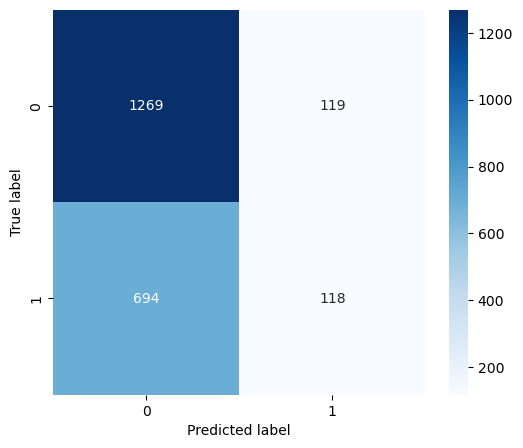

In [216]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'D:/Apps/Microsoft VS Code/output_file.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')
data = data.fillna(0)
data = data[data['popularity'] <= 100]
features = ['duration_ms', 'acousticness', 'explicit', 'mode', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness',  'speechiness', 'tempo', 'valence']
target = 'popularity'

data[target] = data[target].apply(lambda x: 1 if x >= 60 else 0)

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


# 混淆矩阵
cm = confusion_matrix(y_test, predictions)

# 可视化混淆矩阵
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [217]:
clf.feature_importances_

array([0.1012648 , 0.097429  , 0.00875177, 0.010032  , 0.09657753,
       0.09356618, 0.0615645 , 0.0534553 , 0.09281342, 0.10093781,
       0.09264612, 0.09697807, 0.09398351])

Model Accuracy: 54.36%


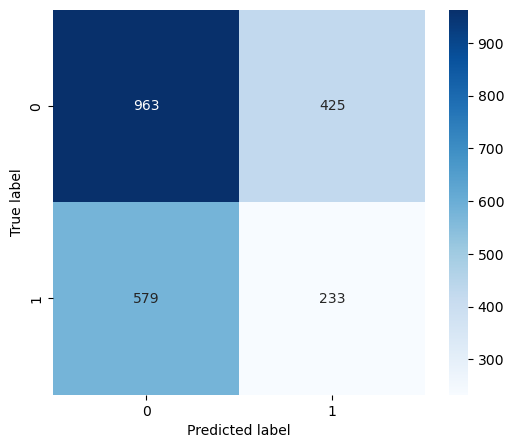

In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

file_path = 'D:/Apps/Microsoft VS Code/output_file.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

data = data.fillna(0)
data = data[data['popularity'] <= 100]

features = ['duration_ms', 'acousticness', 'explicit', 'mode', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness',  'speechiness', 'tempo', 'valence']
target = 'popularity'

data[target] = data[target].apply(lambda x: 1 if x >= 60 else 0)

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)



predictions = clf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [153]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 读取数据
file_path = 'D:/Apps/Microsoft VS Code/output_file.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# 数据清洗
data = data.fillna(0)
data = data[data['popularity'] <= 100]

# 选择特征
features = ['duration_ms', 'acousticness', 'explicit', 'mode', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
data_features = data[features]

# 标准化特征
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# 执行DBSCAN聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['cluster'] = dbscan.fit_predict(data_scaled)

# 查看每个聚类的样本数
print(data['cluster'].value_counts())


-1    10917
 0       76
 1        7
Name: cluster, dtype: int64


In [127]:
from sklearn.model_selection import GridSearchCV

# 定义想要搜索的参数网格
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# 进行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print('Best Parameters: ', grid_search.best_params_)

# 用最佳参数训练模型
best_grid = grid_search.best_estimator_

# 进行预测
grid_predictions = best_grid.predict(X_test)
grid_accuracy = accuracy_score(y_test, grid_predictions)
print(f'Optimized Model Accuracy: {grid_accuracy * 100:.2f}%')

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Optimized Model Accuracy: 64.86%


In [109]:
clf.feature_importances_

array([0.13044806, 0.08715705, 0.08276494, 0.0075379 , 0.0105758 ,
       0.0820748 , 0.08095543, 0.05658192, 0.0462555 , 0.08053479,
       0.08510168, 0.08337314, 0.08435741, 0.08228158])

In [103]:
import os
import pandas as pd

# 指定包含CSV文件的文件夹的路径
folder_path = 'D:/Documentations/Wechat/WeChat Files/wxid_y68wzoox7lsh12/FileStorage/File/2023-10/spotify_new/spotify_new'  

# 获取文件夹中所有的CSV文件
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 初始化一个空的DataFrame来存储数据
all_data = pd.DataFrame()

# 遍历所有的CSV文件
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    
    # 读取CSV文件并将其追加到all_data DataFrame中
    df = pd.read_csv(file_path)
    all_data = all_data.append(df, ignore_index=True)

# 将合并后的数据写入一个新的CSV文件
all_data.to_csv('output_file.csv', index=False)

print("所有文件已成功合并！")


C:\Users\Tianrui Ye\AppData\Local\Temp\ipykernel_7200\1584167998.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
C:\Users\Tianrui Ye\AppData\Local\Temp\ipykernel_7200\1584167998.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
C:\Users\Tianrui Ye\AppData\Local\Temp\ipykernel_7200\1584167998.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
C:\Users\Tianrui Ye\AppData\Local\Temp\ipykernel_7200\1584167998.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.ap

所有文件已成功合并！


In [189]:
import csv
import requests

client_id = 'ff5bbc0ba73b450d8559a6ad7c37dc78'
client_secret = 'e9dea164f9864178977769bd3551056d'
filename = 'D:/Documentations/Wechat/WeChat Files/wxid_y68wzoox7lsh12/FileStorage/File/2023-10/spotify_new/spotify_new/spotify_tracks_2008.csv'
output_filename = 'D:/Apps/out_put_2008.csv'


def get_access_token():
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_response = requests.post(auth_url, {
        'grant_type': 'client_credentials',
        'client_id': client_id,
        'client_secret': client_secret,
    })
    return auth_response.json()['access_token']


def get_genres(artist_id, headers):
    artist_url = f"https://api.spotify.com/v1/artists/{artist_id}"
    response = requests.get(artist_url, headers=headers)
    if response.status_code == 200:
        artist_info = response.json()
        return artist_info.get('genres', [])
    else:
        print(f"无法获取艺术家ID {artist_id} 的流派信息，状态码： {response.status_code}")
        return []


def main():
    access_token = get_access_token()
    headers = {
        'Authorization': 'Bearer {token}'.format(token=access_token)
    }

    with open(filename, mode='r', encoding='utf-8') as csvfile, open(output_filename, mode='w', encoding='utf-8', newline='') as outfile:  # 更新了input_filename为filename
        reader = csv.reader(csvfile)
        writer = csv.writer(outfile)
        writer.writerow(['Song Name', 'Song ID', 'Genres'])
        next(reader)
        for row in reader:
            song_name = row[1]
            base_url = 'https://api.spotify.com/v1/search'
            params = {'q': song_name, 'type': 'track', 'limit': 1}
            response = requests.get(base_url, headers=headers, params=params)
            if response.status_code == 200:
                results = response.json()
                if results['tracks']['items']:
                    song_id = results['tracks']['items'][0]['id']
                    artist_id = results['tracks']['items'][0]['artists'][0]['id']
                    genres = get_genres(artist_id, headers)
                    writer.writerow([song_name, song_id, ', '.join(genres)])
                    print(f"已写入：歌曲名: {song_name}, 歌曲ID: {song_id}, 流派: {genres}")
                else:
                    print(f"无法找到与 {song_name} 相关的歌曲信息")
                    writer.writerow([song_name, 'N/A', 'N/A'])
            else:
                print(f"无法获取 {song_name} 的信息，状态码： {response.status_code}")


if __name__ == "__main__":
    main()

已写入：歌曲名: Heartless, 歌曲ID: 4EWCNWgDS8707fNSZ1oaA5, 流派: ['chicago rap', 'hip hop', 'rap']
已写入：歌曲名: Viva La Vida, 歌曲ID: 1mea3bSkSGXuIRvnydlB5b, 流派: ['permanent wave', 'pop']
已写入：歌曲名: Chicken Fried, 歌曲ID: 0LQtEJt7x0s6knb6RKdRYc, 流派: ['contemporary country', 'country', 'country road', 'modern country rock']
已写入：歌曲名: You're Gonna Go Far, Kid, 歌曲ID: 6TfBA04WJ3X1d1wXhaCFVT, 流派: ['alternative metal', 'permanent wave', 'post-grunge', 'punk', 'rock', 'skate punk', 'socal pop punk']
已写入：歌曲名: Poker Face, 歌曲ID: 5R8dQOPq8haW94K7mgERlO, 流派: ['art pop', 'dance pop', 'pop']
已写入：歌曲名: Sex on Fire, 歌曲ID: 0ntQJM78wzOLVeCUAW7Y45, 流派: ['modern rock', 'rock']
已写入：歌曲名: Walking On A Dream, 歌曲ID: 5r5cp9IpziiIsR6b93vcnQ, 流派: ['australian dance', 'australian electropop', 'dance rock', 'indietronica', 'neo-synthpop']
已写入：歌曲名: Kiss Me Thru The Phone, 歌曲ID: 2q4rjDy9WhaN3o9MvDbO21, 流派: ['atl hip hop', 'chicago bop', 'dance pop', 'pop rap', 'rap', 'southern hip hop', 'trap']
已写入：歌曲名: Just Dance, 歌曲ID: 2x7MyWybabEz6Y6wvH

In [193]:
import pandas as pd

# 定义主要流派列表
main_genres = ['pop', 'rock', 'classical', 'jazz', 'blues', 'country', 'electronic', 'hip hop', 'reggae', 'folk', 'metal']

# 读取CSV文件到DataFrame
file_path = 'D:/Apps/merged_2000_2010.csv'  # 替换为你的文件路径
df = pd.read_csv(file_path)

# 函数用于从细分的流派列表中提取主要的流派
def map_genres(genre_list):
    main_genres_in_row = set()
    for genre in genre_list:
        for main_genre in main_genres:
            if main_genre in genre:  # 如果主要流派的名字出现在细分流派中
                main_genres_in_row.add(main_genre.capitalize() + ' Music')  # 首字母大写并添加到集合中
    return list(main_genres_in_row)

# 将字符串形式的流派列表转换为Python列表
# 将字符串形式的流派列表转换为Python列表，并处理非字符串类型的情况
df['Genres'] = df['Genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])


# 应用映射函数到每一行
df['Main Genres'] = df['Genres'].apply(map_genres)

# 将结果保存到新的CSV文件中
df.to_csv('D:/Apps/merged_2000_2010_new.csv', index=False)  # 替换为你想要保存的文件路径


In [191]:
import pandas as pd

# 初始化一个空的DataFrame来存储合并后的数据
merged_data = pd.DataFrame()

# 遍历2000年到2010年的文件
for year in range(2000, 2011):
    filename = f"D:/Apps/out_put_{year}.csv"
    try:
        # 读取每个文件并将其追加到merged_data中
        data = pd.read_csv(filename)
        data['Year'] = year  # 如果需要，可以添加一个新的列来存储年份
        merged_data = merged_data.append(data, ignore_index=True)
    except FileNotFoundError:
        print(f"{filename} 不存在!")

# 将合并后的数据写入新的CSV文件
output_filename = "D:/Apps/merged_2000_2010.csv"
merged_data.to_csv(output_filename, index=False)
print(f"合并完成，输出文件为 {output_filename}")


合并完成，输出文件为 D:/Apps/merged_2000_2010.csv


C:\Users\Tianrui Ye\AppData\Local\Temp\ipykernel_7200\882175458.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
C:\Users\Tianrui Ye\AppData\Local\Temp\ipykernel_7200\882175458.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
C:\Users\Tianrui Ye\AppData\Local\Temp\ipykernel_7200\882175458.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(data, ignore_index=True)
C:\Users\Tianrui Ye\AppData\Local\Temp\ipykernel_7200\882175458.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  me

In [194]:
import pandas as pd

# 读取CSV文件
filename = 'D:/Apps/merged_2000_2010_new.csv'  # 请替换为您的文件名
df = pd.read_csv(filename)

# 更新'Main Genres'列，移除方括号
df['Main Genres'] = df['Main Genres'].str.strip("[]").str.replace("'", "")

# 将修改后的DataFrame写回CSV文件
df.to_csv('D:/Apps/cleaned_file.csv', index=False)  # 请替换为您希望的输出文件名

print(f"方括号已经从 {filename} 中的 'Main Genres' 列中移除，并且已保存到 'cleaned_file.csv'。")

方括号已经从 D:/Apps/merged_2000_2010_new.csv 中的 'Main Genres' 列中移除，并且已保存到 'cleaned_file.csv'。


In [200]:
import pandas as pd

# 读取CSV文件
filename = 'D:/Apps/cleaned_file.csv'  # 请替换为您的文件名
df = pd.read_csv(filename)

# 将'Main Genres'列中的字符串转换为列表
def split_genres(x):
    if isinstance(x, str):  # 检查x是否为字符串
        return [genre.strip() for genre in x.split(',')]
    else:
        return [x]  # 如果x不是字符串（例如，如果它是NaN），则将其作为列表返回

df['Main Genres'] = df['Main Genres'].apply(split_genres)

# 拆分'Main Genres'列中的多个流派到多行
df = df.explode('Main Genres')

# 分组并计数
grouped = df.groupby(['Year', 'Main Genres']).size().reset_index(name='Count')

# 计算每年的总歌曲数量
yearly_total = df.groupby('Year').size().reset_index(name='Yearly Total')

# 合并总数量到分组计数的DataFrame
grouped = pd.merge(grouped, yearly_total, on='Year')

# 计算比例
grouped['Proportion'] = grouped['Count'] / grouped['Yearly Total']

# 输出结果
print(grouped)

# 如果您需要，还可以将结果写入新的CSV文件
grouped.to_csv('D:/Apps/genres_proportion_per_year.csv', index=False)


     Year       Main Genres  Count  Yearly Total  Proportion
0    2000       Blues Music     10          1299    0.007698
1    2000   Classical Music     18          1299    0.013857
2    2000     Country Music     68          1299    0.052348
3    2000  Electronic Music     18          1299    0.013857
4    2000        Folk Music     19          1299    0.014627
..    ...               ...    ...           ...         ...
116  2010        Jazz Music      4          1326    0.003017
117  2010       Metal Music     73          1326    0.055053
118  2010         Pop Music    448          1326    0.337858
119  2010      Reggae Music     29          1326    0.021870
120  2010        Rock Music    232          1326    0.174962

[121 rows x 5 columns]


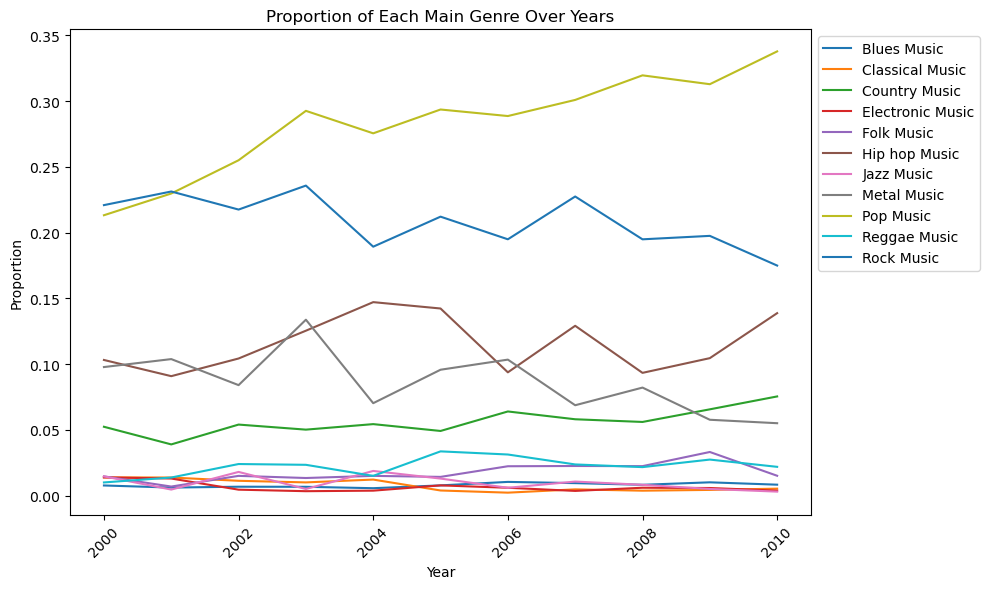

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
filename = 'D:/Apps/genres_proportion_per_year.csv'  # 请替换为您的文件名
df = pd.read_csv(filename)

# 为每个 Main Genres 画一条线
genres = df['Main Genres'].unique()
plt.figure(figsize=(10,6))

for genre in genres:
    subset = df[df['Main Genres'] == genre]
    plt.plot(subset['Year'], subset['Proportion'], label=genre)

plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Proportion of Each Main Genre Over Years')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


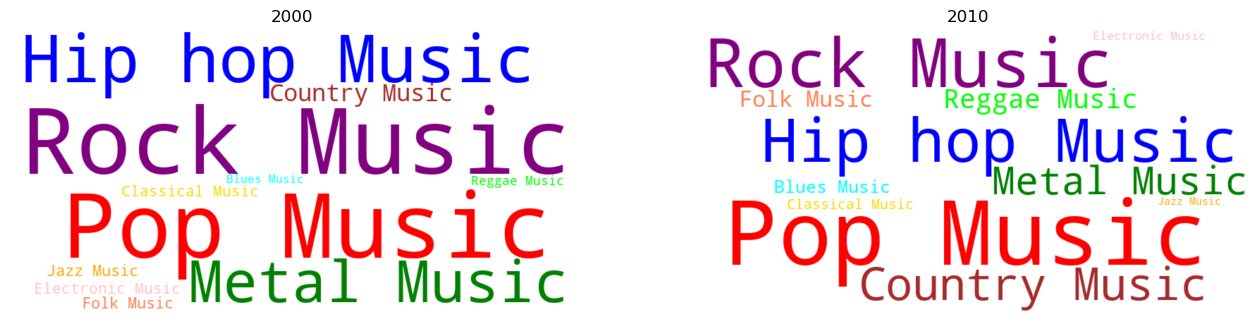

In [214]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 读取数据
filename = 'D:/Apps/genres_proportion_per_year.csv'  # 请替换为您的文件名
df = pd.read_csv(filename)



# 定义 genre 和颜色之间的映射关系
genre_colors = {
    'Pop Music': 'red',
    'Hip hop Music': 'blue',
    'Metal Music': 'green',
    'Rock Music': 'purple',
    'Country Music': 'brown',
    'Jazz Music': 'orange',
    'Electronic Music': 'pink',
    'Folk Music': 'coral',
    'Blues Music': 'cyan',
    'R&B Music': 'magenta',
    'Reggae Music': 'lime',
    'Classical Music': 'gold',
    # ... 请添加更多的 genres 和颜色
}

# 创建颜色函数
def color_func(word, *args, **kwargs):
    return genre_colors.get(word, 'black')  # 如果没有找到 genre，就返回黑色



# 为2000年和2010年的词云创建字典
def generate_dict(year):
    subset = df[df['Year'] == year]
    wordcloud_dict = {}
    for index, row in subset.iterrows():
        wordcloud_dict[row['Main Genres']] = row['Proportion']
    return wordcloud_dict

# 生成词云图
wordcloud_2000 = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate_from_frequencies(generate_dict(2000))
wordcloud_2010 = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate_from_frequencies(generate_dict(2010))

# 展示词云图
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(wordcloud_2000, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('2000')
axs[1].imshow(wordcloud_2010, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('2010')

plt.show()

In [204]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 152.1/152.1 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
